In [21]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas
import matplotlib.colors as colors
from tqdm import tqdm

In [22]:
import ROOT

In [29]:
def extract_all_light(filename, edep_thr_scint=0, edep_thr_BGO=0,  particles=0, isParticle=True, verbose=False, default=-1000):
      
    #BGO and plastic scintillators detector IDs
    detIDmin_BGO = 906
    detIDmax_BGO = 921
    detIDmin_scint = 903
    detIDmax_scint = 904
        
    with uproot.open(filename) as file:
        tree = file["t1"]
        df1 = tree.pandas.df([b'save_particleID',b'save_detID',b'save_edep',b'save_z',b'save_time'])

        #save the particle pdg ID, the detector ID and the x,y,z positions
        #of the hits in the target and in the scintillators

        pID_all = tree[b'save_particleID'].array()
        detID_all = tree[b'save_detID'].array()
        edep_all = tree[b'save_edep'].array()
        z_all = tree[b'save_z'].array()
        t_all = tree[b'save_time'].array()
        evID = 0

        #for each mu+ hitting the target (particleID -13, detID 901):
        #look at edep of gammas (particleID 22) in the BGOs (detID 905 to 922)

        eventID_list = []
        sum_edep_scint_list = []
        z_mean_scint_list = []
        t_mean_scint_list = []
        sum_edep_BGO_list = []
        z_mean_BGO_list = []
        t_mean_BGO_list = []

        #loop in each event
        for pID_list, detID_list, edep_list, z_list, t_list in tqdm(zip(pID_all, detID_all, edep_all, z_all, t_all), total=len(pID_all)):

            ismuon = False
            isscint = False
            isBGO = False
            #scint
            sum_edep_scint = 0
            sum_z_scint = 0
            sum_t_scint = 0
            count_scint = 0
            #BGOs
            sum_edep_BGO = 0
            sum_z_BGO = 0
            sum_t_BGO = 0
            count_BGO = 0

            #loop in each hit of the event
            for pID, detID, edep, zhit, thit in zip(pID_list, detID_list, edep_list, z_list, t_list):           
                #check for detector
                isscint = (detIDmin_scint <= detID <= detIDmax_scint)
                isBGO = (detIDmin_BGO <= detID <= detIDmax_BGO)
                #check for particle
                isParticle = True
                if particles != 0:
                    isParticle = (pID in particles) 
                #if when mu hits target, particle passes through a scintillator or BGO, save info
                if (isParticle and isscint):
                    sum_edep_scint += edep
                    sum_z_scint += zhit
                    sum_t_scint += thit
                    count_scint += 1
                elif (isParticle and isBGO):
                    sum_edep_BGO += edep
                    sum_z_BGO += zhit
                    sum_t_BGO += thit
                    count_BGO += 1

            if sum_edep_scint >= edep_thr_scint and sum_edep_BGO >= edep_thr_BGO:       
                eventID_list.append(evID)
                sum_edep_scint_list.append(sum_edep_scint)
                z_mean_scint_list.append(sum_z_scint/count_scint) if count_scint != 0 else z_mean_scint_list.append(default)
                t_mean_scint_list.append(sum_t_scint/count_scint) if count_scint != 0 else t_mean_scint_list.append(default)
                sum_edep_BGO_list.append(sum_edep_BGO)
                z_mean_BGO_list.append(sum_z_BGO/count_BGO) if count_BGO != 0 else z_mean_BGO_list.append(default)
                t_mean_BGO_list.append(sum_t_BGO/count_BGO) if count_BGO != 0 else t_mean_BGO_list.append(default)

            evID+=1 

            if verbose is True:
                if evID % 100000 == 0:
                    print(evID)

    return eventID_list, sum_edep_scint_list, z_mean_scint_list, t_mean_scint_list, sum_edep_BGO_list, z_mean_BGO_list, t_mean_BGO_list


In [24]:
def extract_all(filename, edep_thr_scint=0, edep_thr_BGO=0,  particles=0, verbose=False, default=-1000):
      
    #BGO and plastic scintillators detector IDs
    detIDmin_BGO = 906
    detIDmax_BGO = 921
    detIDmin_scint = 903
    detIDmax_scint = 904
        
    file = uproot.open(filename)
    tree = file["t1"]
    df1 = tree.pandas.df([b'save_*'])

    #save the particle pdg ID, the detector ID and the x,y,z positions
    #of the hits in the target and in the scintillators

    pID_all = tree[b'save_particleID'].array()
    detID_all = tree[b'save_detID'].array()
    edep_all = tree[b'save_edep'].array()
    x_all = tree[b'save_x'].array()
    y_all = tree[b'save_y'].array()
    z_all = tree[b'save_z'].array()
    t_all = tree[b'save_time'].array()
    evID = 0
        
    #for each mu+ hitting the target (particleID -13, detID 901):
    #look at edep of gammas (particleID 22) in the BGOs (detID 905 to 922)
    
    eventID_list = []
    sum_edep_scint_list = []
    x_mean_scint_list = []
    y_mean_scint_list = []
    z_mean_scint_list = []
    t_mean_scint_list = []
    sum_edep_BGO_list = []
    x_mean_BGO_list = []
    y_mean_BGO_list = []
    z_mean_BGO_list = []
    t_mean_BGO_list = []
    
    #loop in each event
    for pID_list, detID_list, edep_list, x_list, y_list, z_list, t_list in tqdm(zip(pID_all, detID_all, edep_all, x_all, y_all, z_all, t_all), total=len(pID_all)):
        
        ismuon = False
        isscint = False
        isBGO = False
        #scint
        sum_edep_scint = 0
        sum_x_scint = 0
        sum_y_scint = 0
        sum_z_scint = 0
        sum_t_scint = 0
        count_scint = 0
        #BGOs
        sum_edep_BGO = 0
        sum_x_BGO = 0
        sum_y_BGO = 0
        sum_z_BGO = 0
        sum_t_BGO = 0
        count_BGO = 0
        
        #loop in each hit of the event
        for pID, detID, edep, xhit, yhit, zhit, thit in zip(pID_list, detID_list, edep_list, x_list, y_list, z_list, t_list):
            #check for detector
            isscint = (detID >= detIDmin_scint and detID <= detIDmax_scint)
            isBGO = (detID >= detIDmin_BGO and detID <= detIDmax_BGO)
            #check for particle
            isParticle = True
            if particles != 0:
                isParticle = (pID in particles)
            #if when mu hits target, particle passes through a scintillator or BGO, save info
            if (isParticle and isscint):
                sum_edep_scint += edep
                sum_x_scint += xhit
                sum_y_scint += yhit
                sum_z_scint += zhit
                sum_t_scint += thit
                count_scint += 1
            if (isParticle and isBGO):
                sum_edep_BGO += edep
                sum_x_BGO += xhit
                sum_y_BGO += yhit
                sum_z_BGO += zhit
                sum_t_BGO += thit
                count_BGO += 1
        
        if sum_edep_scint >= edep_thr_scint and sum_edep_BGO >= edep_thr_BGO:       
            eventID_list.append(evID)
            sum_edep_scint_list.append(sum_edep_scint)
            x_mean_scint_list.append(sum_x_scint/count_scint) if count_scint != 0 else x_mean_scint_list.append(default)
            y_mean_scint_list.append(sum_y_scint/count_scint) if count_scint != 0 else y_mean_scint_list.append(default)
            z_mean_scint_list.append(sum_z_scint/count_scint) if count_scint != 0 else z_mean_scint_list.append(default)
            t_mean_scint_list.append(sum_t_scint/count_scint) if count_scint != 0 else t_mean_scint_list.append(default)
            sum_edep_BGO_list.append(sum_edep_BGO)
            x_mean_BGO_list.append(sum_x_BGO/count_BGO) if count_BGO != 0 else x_mean_BGO_list.append(default)
            y_mean_BGO_list.append(sum_y_BGO/count_BGO) if count_BGO != 0 else y_mean_BGO_list.append(default)
            z_mean_BGO_list.append(sum_z_BGO/count_BGO) if count_BGO != 0 else z_mean_BGO_list.append(default)
            t_mean_BGO_list.append(sum_t_BGO/count_BGO) if count_BGO != 0 else t_mean_BGO_list.append(default)
            
        evID+=1 
            
        if verbose == True:
            if evID % 100000 == 0:
                print(evID)
        
    return eventID_list, sum_edep_scint_list, x_mean_scint_list, y_mean_scint_list, z_mean_scint_list, t_mean_scint_list, sum_edep_BGO_list, x_mean_BGO_list, y_mean_BGO_list, z_mean_BGO_list, t_mean_BGO_list

In [25]:
#given the coincidence z and t in the BGOs from the previous function
#save the times in downstream/upstream, depending on the z position
#useful for Mu formation diagnostic
def timediff_distr(dividerdown, dividerup, zhits, thits, default=-1000):
    t_down = [] #downstream hit
    t_up = [] #upstream hit
    for z, t in zip(zhits, thits):
        if z > dividerdown:
            t_down.append(t)
        elif z < dividerup and z!=default:
            t_up.append(t)
        
    return t_down, t_up


In [26]:
def timediff_distr_new(dividerdown_begin, dividerdown_end, dividerup, zhits, thits, default=-1000):
    t_down = [] #downstream hit
    t_up = [] #upstream hit
    for z, t in zip(zhits, thits):
        if z > dividerdown_begin and z < dividerdown_end:
            t_down.append(t)
        elif z < dividerup and z!=default:
            t_up.append(t)
        
    return t_down, t_up

In [27]:
def create_fraction(coord0, coord1, fraction):
    #number of events from prob0 list
    n_1 = round(len(coord0[0])*fraction)
    #number of events from prob1 list
    n_0 = len(coord0[0])-n_1
        
    #initialise list and counter
    coord_fraction = []
    for item in range(0, len(coord0)):
        coord_fraction.append([])
    
    countlist = 0
    
    for biglist0, biglist1 in zip(coord0, coord1):
        count = 0
        for item0, item1 in zip(biglist0,biglist1):
            #append events from prob0 list
            if count < n_1:
                coord_fraction[countlist].append(item1)
            #append events from prob1 list
            else:
                coord_fraction[countlist].append(item0)
            #increment counter
            count+=1
        countlist+=1
    
    return coord_fraction
        
    

## Time asymmetry in BGOs with coincidences in scintillator

In [30]:
filename_list = ["musr_6.root", "musr_8.root"]

coords0_t = extract_all_light(filename_list[0], edep_thr_scint=0.5)
coords1_t = extract_all_light(filename_list[1], edep_thr_scint=0.5)


100%|██████████| 1000000/1000000 [06:10<00:00, 2700.70it/s]


In [237]:
fraction = 0.4
coords04_t = create_fraction(coords0_t, coords1_t, fraction)


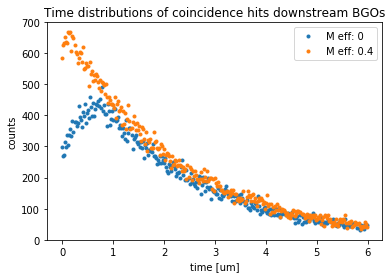

In [31]:
eff_list = [0,fraction]

sum_d_lists = []
sum_u_lists = []

divider = 153.4
step = 28.5
#step = 28.5*3
#step = 28.5*5
divider_down = divider+step
divider_up = divider-step
#divider_down_begin = divider+step*3
#divider_down_end = divider+step*5

bins = np.linspace(0,6,301)

for coords in [coords0_t, coords1_t]:
#for coords in [coords0_t, coords04_t]:
    #times = timediff_distr_new(divider_down_begin,divider_down_end, divider_up, coords[5], coords[6])
    times = timediff_distr(divider_down, divider_up, coords[5], coords[6])
    #downstream
    hist0_d = plt.hist(times[0],bins=bins,alpha=0.3)
    #upstream
    #hist0_u = plt.hist(times[1],bins=bins,alpha=0.3)
    #fill lists of lists
    sum_d_lists.append(hist0_d[0])
    #sum_u_lists.append(hist0_u[0])
plt.close()


for sum_d_list, eff in zip(sum_d_lists, eff_list):
    this_label = "M eff: " + str(eff)
    plt.plot(bins[:-1], sum_d_list, '.', label=this_label)

#x = bins[:-1]
#y = 1050*np.exp(-x/2.2)
#plt.plot(x,y,'-', label="exp")
plt.title("Time distributions of coincidence hits downstream BGOs")
plt.xlabel("time [um]")
plt.ylabel("counts")
plt.legend()
plt.show()

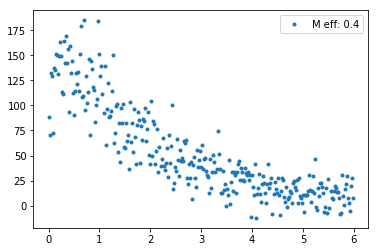

In [119]:
this_label = "M eff: " + str(fraction)
x = bins[:-1]
y = 1050*np.exp(-x/2.2)
plt.plot(bins[:-1], sum_d_lists[1]-y, '.', label=this_label)


plt.legend()
plt.show()

## Check vacuum emission

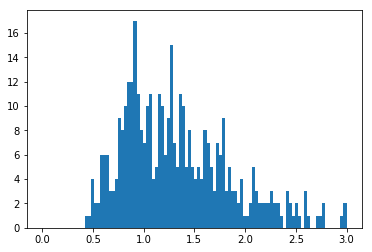

0.406


In [134]:
#filename = "musr_muvac_5kev.root"
filename = "musr_2.root"
file = uproot.open(filename)
tree = file["t1"]
df1 = tree.pandas.df([b'save_particleID',b'save_detID'])

#save the particle pdg ID, the detector ID and the x,y,z positions
#of the hits in the target and in the scintillators

pID_all = tree[b'save_particleID'].array()
detID_all = tree[b'save_detID'].array()
time_all = tree[b'save_time'].array()

count = 0

times_muonium_vac = []

for pID_list, detID_list, time_list in zip(pID_all, detID_all, time_all):
    z_target = []
    newEv = True
    for pID, detID, time_ev in zip(pID_list, detID_list, time_list):
        if pID == -1313 and detID == 701:
            if newEv == True:
                times_muonium_vac.append(time_ev)
            newEv = False
            count+=1

plt.hist(times_muonium_vac, bins=100, range=[0,3])
plt.show()


print(count/len(pID_all))

## BGOs

In [6]:
filename_eff0 = "musr_3.root"
data_0 = extract_all(filename_eff0)

100%|██████████| 1000000/1000000 [07:34<00:00, 2201.53it/s]


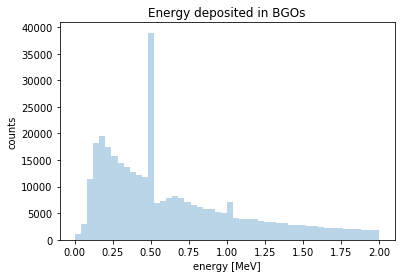

In [136]:
plt.hist(data_0[6],bins=50,range=[0.001,2], alpha=0.3)
#plt.hist(edep_0,bins=50, alpha=0.3)
plt.title("Energy deposited in BGOs")
plt.xlabel("energy [MeV]")
plt.ylabel("counts")
plt.show()

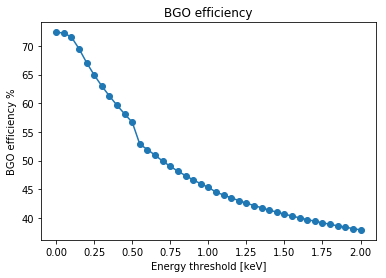

In [137]:
cumul = []
x_axes = np.linspace(0,2,41)
for threshold in x_axes:
    edep_above_thr = [x for x in data_0[6] if x > threshold]
    cumul.append(len(edep_above_thr)/(data_0[0])[-1]*100)

plt.plot(x_axes, cumul, 'o-')
plt.title("BGO efficiency")
plt.xlabel("Energy threshold [keV]")
plt.ylabel("BGO efficiency %")
plt.show()


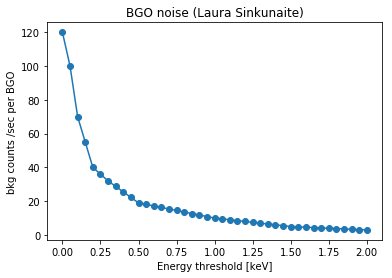

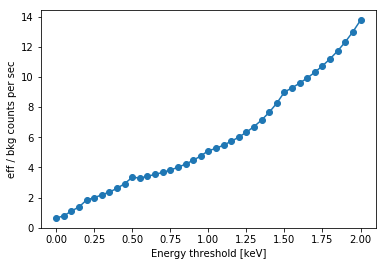

In [67]:
#energy threshold
bkg_sampling = [0,0.05,0.1,0.2,0.3,0.5,1,1.5,2]
#number of bkg counts per BGO per second, given energy threshold
#(integral of number of bkg counts per second above threshold)
bkg_points = [120,100,70,40,32,19,10,5,3]

# make plot as dense as efficiency one

bkg_interp = np.interp(x_axes, bkg_sampling, bkg_points)

plt.plot(x_axes, bkg_interp, 'o-')
plt.title("BGO noise (Laura Sinkunaite)")
plt.xlabel("Energy threshold [keV]")
plt.ylabel("bkg counts /sec per BGO")
plt.show()


#make plot of efficiency/bkg vs energy threshold

plt.plot(x_axes, cumul/bkg_interp, 'o-')
plt.xlabel("Energy threshold [keV]")
plt.ylabel("eff / bkg counts per sec")
plt.show()




## Scintillators

In [46]:
filename_eff0 = "musr_3.root"
data_0 = extract_all(filename_eff0)
data_0_pos = extract_all(filename_eff0, particles=[-11])
data_0_el = extract_all(filename_eff0, particles=[11])

100%|██████████| 1000000/1000000 [02:27<00:00, 6792.76it/s]


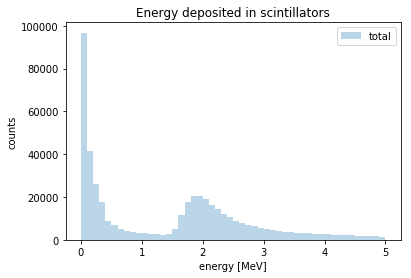

In [9]:
plt.hist(data_0_pos[1],bins=50,range=[0.001,5], alpha=0.3, label='positrons')
plt.hist(data_0_el[1],bins=50,range=[0.001,5], alpha=0.3, label='electrons')
plt.title("Energy deposited in scintillators")
plt.xlabel("energy [MeV]")
plt.ylabel("counts")
plt.legend()
plt.show()


plt.hist(data_0[1],bins=50, range=[0.001,5],alpha=0.3, label='total')
plt.title("Energy deposited in scintillators")
plt.xlabel("energy [MeV]")
plt.ylabel("counts")
plt.legend()
plt.show()





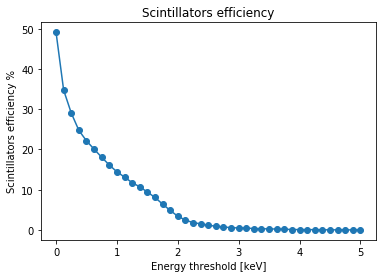

In [30]:
cumul = []
x_axes = np.linspace(0,5,41)
for threshold in x_axes:
    edep_above_thr = [x for x in data_0[1] if x > threshold]
    cumul.append(len(edep_above_thr)/(data_0[0])[-1]*100)

plt.plot(x_axes, cumul, 'o-')
plt.title('Scintillators efficiency')
plt.xlabel("Energy threshold [keV]")
plt.ylabel("Scintillators efficiency %")
plt.show()

In [16]:
def get_times_muform(filename, thr_scint=0, thr_bgo=0):

    file = uproot.open(filename)
    tree = file["t1"]
    df1 = tree.pandas.df([b'scint_time',b'scint_edep',b'bgo_time',b'bgo_edep'])
    
    bgo_edep = tree[b'bgo_edep'].array()
    bgo_time = tree[b'bgo_time'].array()
    scint_edep = tree[b'scint_edep'].array()
    scint_time = tree[b'scint_time'].array()
    
    bgo_time_coinc = []
    
    for bedep, btime, sedep, stime in tqdm(zip(bgo_edep, bgo_time, scint_edep, scint_time)):
        if bedep > thr_bgo and sedep > thr_scint:
            bgo_time_coinc.append(btime)
            
    return bgo_time_coinc


def get_scint_edep(filename, nozeros=True):

    file = uproot.open(filename)
    tree = file["t1"]
    df1 = tree.pandas.df([b'scint_edep'])
    
    scint_edep = tree[b'scint_edep'].array()
    
    if nozeros == True:
        scint_edep = [x for x in scint_edep if x!=0]
            
    return scint_edep
            


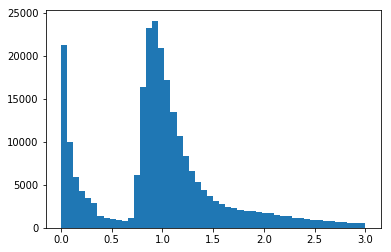

In [17]:
plt.hist(get_scint_edep("musr_6.root"), range=[0,3], bins=50)
plt.show()


2000000it [00:02, 705770.66it/s]
2000000it [00:02, 715464.56it/s]


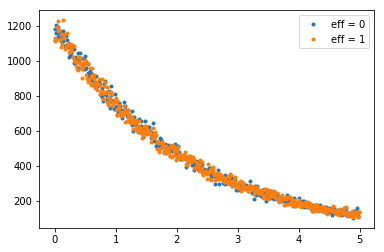

In [58]:
thr_scint = 0.5
fraction = 0.4

coord0 = get_times_muform('musr_8.root', thr_scint=thr_scint)
coord1 = get_times_muform('musr_9.root', thr_scint=thr_scint)
coord04 = create_fraction(coord0, coord1, fraction)
 
bins = np.linspace(0,5,501)

times = []
for coords in [coord0, coord04]:
    hist = plt.hist(coords, alpha=0.4, bins=bins)
    times.append(hist[0])
plt.close()

labels = ['eff = 0', 'eff = 1']
#labels = ['eff = 0', 'eff = 0.4']
for time_list, label in zip(times, labels):
    plt.plot(bins[:-1], time_list, '.', label=label)
plt.legend()
plt.show()

In [32]:
def create_fraction(times0, times1, fraction):
    #number of events from prob0 list
    n_1 = round(min(len(times0), len(times1))*fraction)
    #number of events from prob1 list
    n_0 = min(len(times0), len(times1))-n_1
        
    #initialise list and counter
    coord_fraction = []
    count = 0
    
    for item0, item1 in zip(times0, times1):
        #append events from prob0 list
        if count < n_1:
            coord_fraction.append(item1)
        #append events from prob1 list
        else:
            coord_fraction.append(item0)
        #increment counter
        count+=1
    if count%1000==0:
        print(counts)
    
    return coord_fraction